# Deep Learning Final Project

Submitted by: Albert Khayat - 212747026, David Afik - 318267721

# Setup

### Imports

In [10]:
import torch

from model.MainModel import Painter
from data import ImagesDataset


### Configurations

In [ ]:
print(f"CUDA version: {torch.version.cuda}")

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
    print(f"Name of current CUDA device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    DEVICE = torch.device('cpu')
    print('Running on CPU')

### Load Data

In [12]:
DATA_PATH = "data"

PRESET = False	# if true, reads datasets from test and train folders in DATA_PATH
TRAIN_SIZE = 8000
TEST_SIZE = 2000

BATCH_SIZE_TRAIN = 16
BATCH_SIZE_TEST = 20

SPLIT_SEED = 12

# Get dataset
train_data, test_data = ImagesDataset.create_datasets(DATA_PATH, TRAIN_SIZE, TEST_SIZE, seed=SPLIT_SEED, preset=PRESET, device=DEVICE)

train_data.print_stats()
test_data.print_stats()

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE_TRAIN, shuffle=True, pin_memory=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE_TEST, shuffle=True, pin_memory=False)

=====Dataset Stats=====
Image count: 8000

=====Dataset Stats=====
Image count: 2000



# Train Model

In [13]:
# Training parameters
MODEL_NAME = "final final"		# Used for save path
PRE_TRAIN = False		# if True, pre-trains generator
LOAD = False			# if True, loads model with model_name before train
LOAD_PRETRAIN = False	# if True, loads pre-train data
SAVE_MODEL = False		# if True, saves model every epoch

PRE_EPOCHS = 0
NUM_EPOCHS = 0

In [14]:
# Create model
model = Painter(MODEL_NAME, load=LOAD, load_pretrain=LOAD_PRETRAIN, device=DEVICE).to(DEVICE)

n_params_g, n_params_d = model.count_parameters()
print(f"Number of generator parameters: {n_params_g:,}")
print(f"Number of discriminator parameters: {n_params_d:,}")
print(f"Number of parameters: {(n_params_d + n_params_g):,}")

Number of generator parameters: 2,270,754
Number of discriminator parameters: 3,921,697
Number of parameters: 6,192,451


In [15]:
if PRE_TRAIN:
	# Pre-train generator
	for e in range(PRE_EPOCHS):
		print(f"Epoch {model.logger.epochs_pretrained+1}/{PRE_EPOCHS + model.logger.epochs_pretrained - e}")

		train_loss = model.pretrain_generator(train_loader)
		test_loss = model.test_model(test_loader, pretrain=True)
		
		print(f"L1 test loss: {test_loss:.6f}")
		model.logger.plot_coloring()

		model.logger.after_pretrain(train_loss, test_loss)

		if SAVE_MODEL: model.save(pretrain=True)

	model.logger.plot_performence(pretrain=True)

In [16]:
# Train model
for e in range(NUM_EPOCHS):
	print(f"Training epoch {model.logger.epochs_trained+1}/{NUM_EPOCHS + model.logger.epochs_trained - e}")

	model.train_model(train_loader)
	model.test_model(test_loader, log=True)

	# Show loss and coloring after epoch
	model.logger.print_epoch()
	model.logger.plot_coloring()

	if SAVE_MODEL: model.save()

if model.logger.epochs_trained > 0: model.logger.plot_performence()

# Test Model

In [17]:
# If set to None, tests model from the prevous code blocks
model_name = 'final final'

if model_name is not None: model = Painter(model_name, load=True, device=DEVICE)

Test:   0%|          | 0/100 [00:00<?, ?it/s]

Discriminator loss: 2.219956314712763, Generator loss: 9.271132875084877


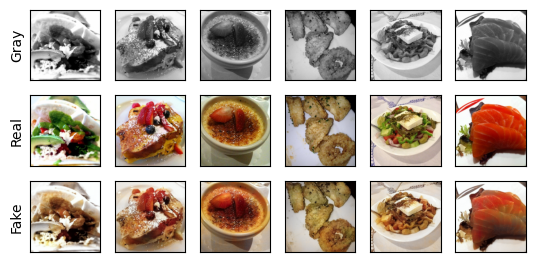

In [18]:
loss_fake, loss_real, gan_loss, l1_loss, loss_d, loss_g = model.test_model(test_loader)
print(f'Discriminator loss: {loss_d}, Generator loss: {loss_g}')
model.logger.plot_coloring()